# **Energy consumption and Renewable Energy Production Forecasting**
### **M606 Machine Learning Final Project**
#### **Name: Batuhan ÖZTÜRK - GH1031500**
#### **Date: 27.03.2025**

## ** Introduction

This project aims to predict 'energy consumption and renewable energy production ' in around the European using machine learning models.

**Dataset:**
- I used the 'Open Power systems Data' dataset.
- The dataset contains ' time_series_60min_singleindex.csv', suitable for forecasting.

**Problem Definition**
- Forecasting 'energy consumption and renewable energy production' in advance can help improve energy effiency.
- Typical machine learning models were tested to the best-performing model.

**Machine Learning Models Used**
- **Traditional model :** Linear Regression,SVM,Random Forest,Decision Trees,KNN,Naive Bayes
- **Time Series model:** ARIMA
- **Deep Learning Model:** LSTM

## ** Dataset Download Link**
- **The dataset is too large to be stored on GitHun. You can download this link.**
- [Download Dataset][https://drive.google.com/file/d/1CxOBHcBApiqACYr4axwOPHhZMLF7MYrW/view?usp=drive_link]

## **Porject Repository on GitHub**
**Access the full project repository on GitHub:**
[GitHub Repository](https://github.com/BatuhanOzturk0/Energy_Consumption_Prediction)

In [7]:
#Install the necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


# Read csv file
df = pd.read_csv("time_series_60min_singleindex.csv")

df.head()



,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [8]:
print(df.dtypes)

df.head

utc_timestamp                            object
cet_cest_timestamp                       object
AT_load_actual_entsoe_transparency      float64
AT_load_forecast_entsoe_transparency    float64
AT_price_day_ahead                      float64
                                         ...   
SK_load_forecast_entsoe_transparency    float64
SK_solar_generation_actual              float64
SK_wind_onshore_generation_actual       float64
UA_load_actual_entsoe_transparency      float64
UA_load_forecast_entsoe_transparency    float64
Length: 300, dtype: object


<bound method NDFrame.head of               utc_timestamp        cet_cest_timestamp  \
0      2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1      2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2      2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3      2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4      2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   
...                     ...                       ...   
50396  2020-09-30T19:00:00Z  2020-09-30T21:00:00+0200   
50397  2020-09-30T20:00:00Z  2020-09-30T22:00:00+0200   
50398  2020-09-30T21:00:00Z  2020-09-30T23:00:00+0200   
50399  2020-09-30T22:00:00Z  2020-10-01T00:00:00+0200   
50400  2020-09-30T23:00:00Z  2020-10-01T01:00:00+0200   

       AT_load_actual_entsoe_transparency  \
0                                     NaN   
1                                  5946.0   
2                                  5726.0   
3                                  5347.0   
4                                  5249.0   
...            

In [ ]:
#convert the utc_timestamp column to datetime

df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

#set the utc_timestampt column as an index
df.set_index('utc_timestamp', inplace=True)

df.head

<bound method NDFrame.head of                                  cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00  2015-01-01T00:00:00+0100   
2015-01-01 00:00:00+00:00  2015-01-01T01:00:00+0100   
2015-01-01 01:00:00+00:00  2015-01-01T02:00:00+0100   
2015-01-01 02:00:00+00:00  2015-01-01T03:00:00+0100   
2015-01-01 03:00:00+00:00  2015-01-01T04:00:00+0100   
...                                             ...   
2020-09-30 19:00:00+00:00  2020-09-30T21:00:00+0200   
2020-09-30 20:00:00+00:00  2020-09-30T22:00:00+0200   
2020-09-30 21:00:00+00:00  2020-09-30T23:00:00+0200   
2020-09-30 22:00:00+00:00  2020-10-01T00:00:00+0200   
2020-09-30 23:00:00+00:00  2020-10-01T01:00:00+0200   

                           AT_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                              5946

In [ ]:
#calculate missing data rate
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

#display only missing data 
missing_data =pd.DataFrame ({'Missing Data Value': missing_values , 'Missing Data Percent': missing_percent})
missing_data =missing_data[missing_data["Missing Data Value"] > 0]

missing_data.sort_values(by="Missing Data Percent", ascending = False, inplace =True )


missing_data.head(20)

,Missing Data Value,Missing Data Percent
HR_solar_generation_actual,50391,99.980159
HR_wind_onshore_generation_actual,50379,99.956350
PT_wind_offshore_generation_actual,47509,94.262019
PT_wind_generation_actual,47509,94.262019
PL_solar_generation_actual,46237,91.738259
HU_solar_generation_actual,41436,82.212655
SK_wind_onshore_generation_actual,40722,80.796016
NO_5_wind_onshore_generation_actual,40132,79.625404
NO_1_wind_onshore_generation_actual,35815,71.060098
DE_LU_load_forecast_entsoe_transparency,33745,66.953037


In [ ]:
#Detect column more than 90% missing data

threshold = 90 #remove %90 missing data 

columns_to_drop = missing_data[missing_data["Missing Data Value"]>threshold].index

#remove column from dataset
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.shape

(50401, 157)

In [ ]:
#let fill in missing data use with linear interpolation
df_cleaned=df_cleaned.interpolate(method='linear')

#check if the missing data is still in column
missing_after_fill=df_cleaned.isnull().sum().sum()
print(f"Total Number of missing data (after filling):{missing_after_fill}")

C:\Users\Batuhan Öztürk\AppData\Local\Temp\ipykernel_23344\857218703.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_cleaned=df_cleaned.interpolate(method='linear')


Total Number of missing data (after filling):756


In [ ]:
#let completely remove the rows in missing data 
df_cleaned=df_cleaned.dropna()

#Last check
missing_after_drop = df_cleaned.isnull().sum().sum()
print(f"Number of missing data remaining after deleting rows:{missing_after_drop}")


Number of missing data remaining after deleting rows:0


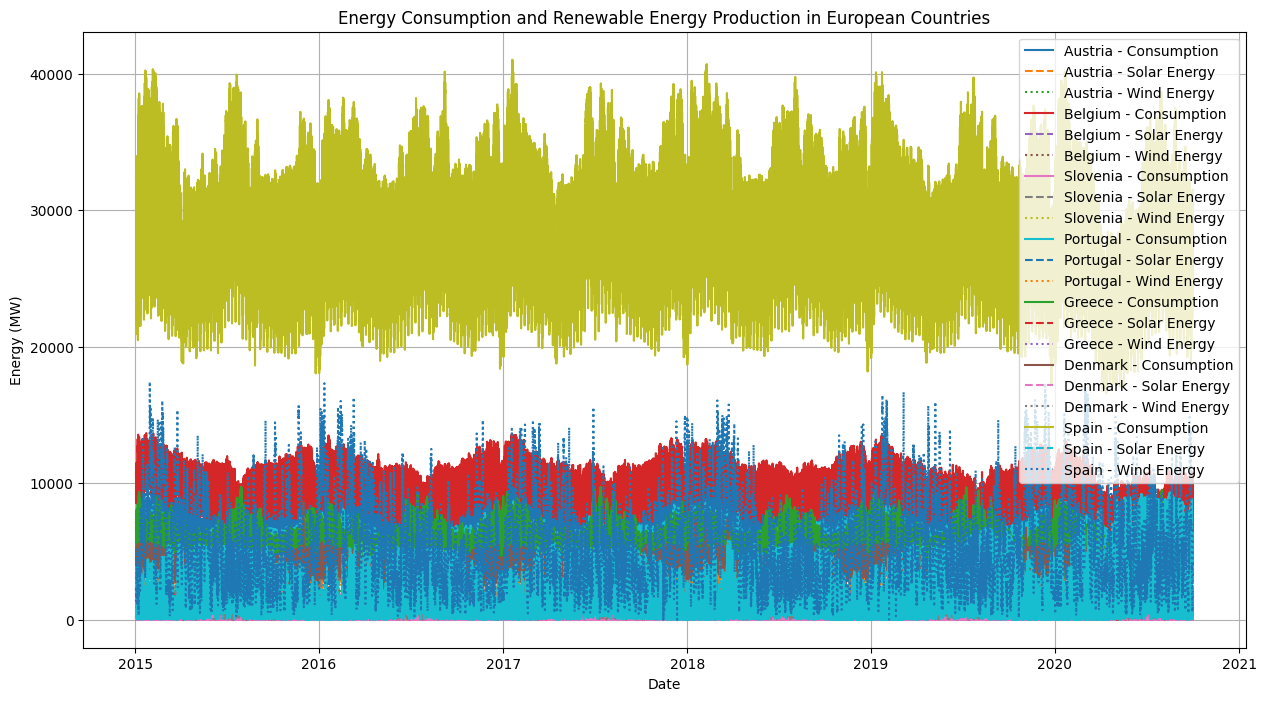

In [ ]:
import matplotlib.pyplot as plt

#select country for comparison 
selected_countries = {
    "Austria":['AT_load_actual_entsoe_transparency', 'AT_solar_generation_actual','AT_wind_onshore_generation_actual'],
    "Belgium":['BE_load_actual_entsoe_transparency', 'BE_solar_generation_actual','BE_wind_onshore_generation_actual'],
    "Slovenia":['SI_load_actual_entsoe_transparency', 'SI_solar_generation_actual','SI_wind_onshore_generation_actual'],
    "Portugal":['PT_load_actual_entsoe_transparency', 'PT_solar_generation_actual','PT_wind_onshore_generation_actual'],
    "Greece":['GR_load_actual_entsoe_transparency', 'GR_solar_generation_actual','GR_wind_onshore_generation_actual'],
    "Denmark":['DK_load_actual_entsoe_transparency', 'DK_solar_generation_actual','DK_wind_onshore_generation_actual'],
    "Spain":['ES_load_actual_entsoe_transparency', 'ES_solar_generation_actual','ES_wind_onshore_generation_actual'],
    
    
    
}

#create graph
plt.figure(figsize=(15,8))

for country, columns in selected_countries.items():
    plt.plot(df_cleaned[columns[0]], label = f"{country} - Consumption")
    plt.plot(df_cleaned[columns[1]], linestyle= 'dashed',label=f"{country} - Solar Energy")
    plt.plot(df_cleaned[columns[2]], linestyle= 'dotted',label=f"{country} - Wind Energy")

plt.title("Energy Consumption and Renewable Energy Production in European Countries")
plt.xlabel("Date")
plt.ylabel("Energy (MW)")
plt.legend()
plt.grid()
plt.show()


Highest energy consumption :

Spain is the country the highest energy consumption.
Energy consumption volatile and seasonal.

Solar energy Production :

It's volatile and peaks in some time periods, the reason is seasonality.
Usually increase in the summer months and decrease in winter.

Wind energy Prudction :

More irregularly and frequantly ,but some countries have stable production in periods.
Wind energy may be higher in Spain and Denmark.

Seasonality and Trends :

Energy consumption usually increase in winter.
Solar energy production decrease in summer .
Wind energy production changing looks depen on weather conditions rather.




In [ ]:

from sklearn.model_selection import train_test_split

#select energy consumption for model.
energy_columns = [ col for col in df_cleaned.columns if 'load_actual_entsoe_transparency' in col]

#independent variables
X = df_cleaned.index.astype('int64').values.reshape(-1,1)  #convert date to numeric
y = df_cleaned['AT_load_actual_entsoe_transparency'].values 

#let split data into testing(80%),training(20%) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=False)

print(f"X_train size: {X_train.shape},X_test size: {X_test.shape}")

X_train size: (40293, 1),X_test size: (10074, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#create model and train
lr_model= LinearRegression()
lr_model.fit(X_train,y_train)

#prediction
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)

print(f"Lineer Regression Result:")
print(f"MAE: {mae_lr:.2f}")
print(f"MAE: {mse_lr:.2f}")
print(f"R^2 score: {r2_lr:.2f}")


Lineer Regression Result:
MAE: 1235.04
MAE: 2220259.85
R^2 score: -0.16


# 1- LINEAR REGRESSION RESULTS 

Mean absolute error(MAE) : 1235.04 (average prediction error quite high )
Mean squred error (MSE) : 2,220,259.85( quite error rate)
R^2 Score : -0,16 ( There is negative value, so model performing is poorly)

Linear regression model is not good for data.
The model does not catch trends,seasonality in time series well.
Negative R^2 score that the model is worse random  guessing.

This model is not usable for time series guessing.



In [12]:
from sklearn.svm import SVR

#Create SVR model and train ( for RBF)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

#make prediction

y_pred_svm  = svm_model.predict(X_test)

#Performances metrics
mae_svm = mean_absolute_error(y_test,y_pred_svm)
mse_svm = mean_squared_error(y_test,y_pred_svm)
r2_svm = r2_score(y_test,y_pred_svm)

#show results

print(f"Support vector machine(SVM) Results:")
print(f"MAE: {mae_svm:.2f}")
print(f"MSE: {mse_svm:.2f}")
print(f"R^2 Results: {r2_svm:.2f}")


Support vector machine(SVM) Results:
MAE: 1155.55
MSE: 1924063.58
R^2 Results: -0.00


# 2- SUPPORT VECTOR MEACHINES RESULTS : 

Mean absolute error(MAE) : 1155.55 (Better than linear regression but quite high )
Mean squred error (MSE) : 1,924,063.58( error rate slightly less than linear regression but quite error )
R^2 Score : -0,00 ( There is no significant value, so model performing  not contribution to data)


SVM  model is better than Linear regression but not perfect for data.
The model does not catch trends,seasonality in time series well.
We need to use time series forecasting for R^2 score.

This model is not usable for time series guessing.

In [13]:
from sklearn.tree import DecisionTreeRegressor

#build decision tree regressor and train

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

#make prediction
y_pred_dt =dt_model.predict(X_test)

#performance metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test,y_pred_dt)
r2_dt = r2_score(y_test,y_pred_dt)

#Show result
print(f"Decision Tree Results:")
print(f"MAE:{mae_dt:.2f}")
print(f"MSE:{mse_dt:.2f}")
print(f"R^2 Results: {r2_dt:.2f}")

Decision Tree Results:
MAE:1179.85
MSE:2013841.54
R^2 Results: -0.05


# 3- DECISION TREE RESULTS :
Mean absolute error(MAE) : 1179.85(Worse than SVM and error value so close Linear Regression. )
Mean squred error (MSE) : 2,013,841.54( Quite high error rate , so this model not catch  data well. )
R^2 Score : -0,05 ( The accuracy of model is close to zero , so negative R^2 again failure in this model)


Decision model does not fit data perfect.
The model does not catch trends,seasonality in time series well,because the data type is energy consumption time series.
The model try to tend to memorize the data , so that model not clear for R^2 score.

This model is not usable for time series guessing.

In [14]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest regression build and train 

rf_model = RandomForestRegressor (n_estimators =100 , random_state=42)
rf_model.fit(X_train , y_train)

#make prediction

y_pred_rf = rf_model.predict(X_test)

#Performance metrics
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

#show results
print(f"Random Forest results:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")

Random Forest results:
MAE: 1152.06
MSE: 1934167.19
R^2 Score: -0.01


# 4- RANDOM FOREST RESULTS :
Mean absolute error(MAE) : 1152.06 (Lower than other models but still high. )
Mean squred error (MSE) : 1,934,167.19( so similar to like SVM but error still continue. )
R^2 Score : -0,01 ( The accuracy of model is negative value , so negative R^2 again failure in this model)


Decision model  better than Decision Trees and still fail.
The model does not catch trends,seasonality in time series well,because the data type is energy consumption time series.
The model try to tend to memorize the data .So that model not clear for R^2 score,because this data model can not learn sequential dependency.

This model is not usable for time series guessing.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

#KNeighbors regression model build and train
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

#make prediction
y_pred_knn =knn_model.predict(X_test)

#Performance Metric

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test,y_pred_knn)
r2_knn = r2_score(y_test,y_pred_knn)

#Show Results

print(f"K-Nearest Neighbors Regression (KNN) Result:")
print(f"MAE: {mae_knn:.2f}")
print(f"MSE: {mse_knn:.2f}")
print(f"R^2 score : {r2_knn:.2f}")

K-Nearest Neighbors Regression (KNN) Result:
MAE: 1397.90
MSE: 3105403.25
R^2 score : -0.62


# 5- K-NEAREST NEIGHBOR RESULTS :
Mean absolute error(MAE) : 1397.0 (One of the worst error rates. )
Mean squred error (MSE) : 3,105,403.25( Very high error data in this model and does not fix data. )
R^2 Score : -0,62 ( The model R^2 score is negative value , so it is worse than random guessing)


KNN model is completely unsuitable.
KNN model is type like neighborhood-based alghoritms so, KNN model fail in this data.
The Error Data is very high and predictions so bad.

This model is not usable for time series guessing.

In [16]:
from sklearn.naive_bayes import GaussianNB

#Naive bayes model build and train

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#make predictions
y_pred_nb = nb_model.predict(X_test)

mae_nb= mean_absolute_error(y_test,y_pred_nb)
mse_nb= mean_squared_error(y_test,y_pred_nb)
r2_nb = r2_score(y_test,y_pred_nb)

#Show result
print(f"Naive bayes results:")
print(f"MAE: {mae_nb:.2f}")
print(f"MSE: {mse_nb:.2f}")
print(f"R^2 score: {r2_nb:.2f}")

Naive bayes results:
MAE: 1386.63
MSE: 2787708.75
R^2 score: -0.46


# 6- NAIVE BAYES RESULTS :
Mean absolute error(MAE) : 1386.63 (Better than KNN but too high )
Mean squred error (MSE) : 2,787,708.75( Very high error data in this model and fails. )
R^2 Score : -0,46 ( The model R^2 score is negative value , so it is worse than random guessing)


Naive Bayes model is completely unsuitable for this series.
Naive bayes modelcan not learn serial dependency of this data so the error value is high 
This model usually using for classification.

This model is definitely unsuccessful for time series guessing.

In [17]:
!pip install statsmodels

In [18]:
import statsmodels.api as sm

#ARIMA Model build and train for this value (p=5, d=1 q=0)

arima_model =sm.tsa.ARIMA(y_train, order =(5,1,0,))
arima_model_fit =arima_model.fit()

#make predections for test set
y_pred_arima = arima_model_fit.forecast(steps=len(y_test))

#Performance metrics

mae_arima =mean_absolute_error(y_test, y_pred_arima)
mse_arima =mean_squared_error(y_test,y_pred_arima)
r2_arima = r2_score(y_test,y_pred_arima)

#show results

print(f"ARIMA model results:")
print(f"MAE: {mae_arima:.2f}")
print(f"MSE: {mse_arima:.2f}")
print(f"R^2 score: {r2_arima:.2f}")





ARIMA model results:
MAE: 1268.23
MSE: 2344089.04
R^2 score: -0.22


# 7- ARIMA (AutoRegressive Integrated Moving Average) MODEL RESULTS :
Mean absolute error(MAE) : 1268.23 (Better than before the model but too high )
Mean squred error (MSE) : 2,344,089.04( error rate is lower other model but too high. )
R^2 Score : -0,22 ( Negative value still can not predict well)


The ARIMA model working better before model but not good enough.
Time series models generally usually requires additional parameters or complex deep learning models to get better value.


ARIMA is better than previous model, but not well

In [19]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense ,Dropout
from sklearn.preprocessing import MinMaxScaler

#Scale data for LSTM
scaler = MinMaxScaler (feature_range =(0,1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.reshape(-1,1))

#Create LSTM Input data (like time series)
def create_lstm_data(data,time_steps=10):
    Xs,ys =[],[]
    for i in range(len(data)-time_steps):
      Xs.append(data[i:(i+time_steps),0])
      ys.append(data[i+time_steps,0])
    return np.array(Xs), np.array(ys)

#training and data value convert to LSTM type 
time_steps = 10
X_train_lstm,y_train_lstm = create_lstm_data(y_train_scaled,time_steps)
X_test_lstm,y_test_lstm =create_lstm_data(y_test_scaled,time_steps)

#input data must be 3D for LSTM
X_train_lstm= X_train_lstm.reshape((X_train_lstm.shape[0],X_train_lstm.shape[1],1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0],X_test_lstm.shape[1],1))

# Create LSTM Model

model = Sequential([
    LSTM(50,return_sequences=True,input_shape=(time_steps,1)),
    Dropout(0.2),
    LSTM(50,return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])


#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(X_train_lstm,y_train_lstm,batch_size=16,epochs=10,verbose=1)

#make predections with test value
y_pred_lstm = model.predict(X_test_lstm)

#turn the scales back
y_pred_lstm=scaler.inverse_transform(y_pred_lstm.reshape(-1,1))
y_test_lstm=scaler.inverse_transform(y_test_lstm.reshape(-1,1))

#performance metrics

mae_lstm =mean_absolute_error(y_test_lstm,y_pred_lstm)
mse_lstm =mean_squared_error(y_test_lstm,y_pred_lstm)
r2_lstm= r2_score(y_test_lstm,y_pred_lstm)

#show results

print(f"LSTM model results:")
print(f"MAE: {mae_lstm:.2f}")
print(f"MSE: {mse_lstm:.2f}")
print(f"R^2 Score:{r2_lstm:.2f}")


Epoch 1/10


c:\Users\Batuhan Öztürk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2518/2518 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0132
Epoch 2/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0012
Epoch 3/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 9.6424e-04
Epoch 4/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 9.2256e-04
Epoch 5/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 8.5182e-04
Epoch 6/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 8.1098e-04
Epoch 7/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 7.6608e-04
Epoch 8/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 7.3900e-04
Epoch 9/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 6.9665e-04
Epoch 10/10
2518/2518 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 7.1566e-04
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM model results:
MAE: 185.46
MSE: 51565.43
R^2 Score:0.97


# 8- LSTM (LONG -SHORT TERM MEMORY) DEEP LEARNING MODEL RESULTS :
Mean absolute error(MAE) : 185.46 (Lowest error in all model)
Mean squred error (MSE) : 51,565.43( error rate is lower other model and much lower )
R^2 Score : 0.97 ( this model learned data almost well)


LSTM performed better than all machine learning models by far.
Its catched sequential dependency of time series the best. R^2 score is 0.97. the meaning of this model and value fits the data %97 of the time .


LSTM is the best model for energy consumption guessing.

## **FINAL CONCLUSION AND BEST MODEL SELECTION**

### **Model Comparison and Evulation**

This project aims to predict 'energy consumption and renewable energy production ' in around the European using machine learning models.

### **Key Findings**

- **Traditional machine learning models(Linear regression,SVM,Decision Trees,Random Forest,KNN,Naive bayes) were inadequate for time series forecasting.These models could not catch seasonality and long term in the data**
- **ARIMA model performed better than traditional methods, but error value high.Although it could catch certain patterns in series, so not fully learn complex relationships in data**
- **LSTM model performed by far the best R^2 = 0.97 and the lowest error value (MAE=185.46, MSE=51,565.43). This model better guessed changes in energy consumption by better understanding nature of time .**

### **Why Did Other ModelS Fail ?**

- **Linear regression and SVM : These models assume a linear relationship between input and output.However , this model energy consumption data irregular and complex , so could not make accurate predictions.**
- **Decision Trees and Random Forest: These algorithms usually work good on table data, but they were so bad in time series, because they could not learn the sequential structure  of data.**
- **KNN and Naive Bayes: These models  are not suitable for time quessing.They performed very bad because could not learn long-term relationships in data.**
- **ARIMA: Classic time series model , it could not catch complex patterns correctly.**

### **Conclusion and Recommendations**

In this study, the LSTM model was much more successful than other models , because this model can better analyze trends,seasonality and time-dependet changes seen in time.

Future improvements could involve :
- **Extending LSTM Model more layers and performing hyperparameter optimization.**
- **Combining LSTM Model with other time series model like as ARIMA,KNN.**
- **Instead of this making quessing based on past data , also takes into other factor like weather and economic indicators.**






## **FINALLY**

As a result , The LSTM model outperformed all other models in time series forecasting.


